## 1. Imports

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import os

print(f"{tensorflow.__version__}")

2.6.4


## 2. Constants


In [215]:
DIR = "/kaggle/input/playground-series-s3e3"
TRAIN_PATH = os.path.join(DIR, "train.csv")
TEST_PATH = os.path.join(DIR, "test.csv")
SAMPLE_SUB_PATH = os.path.join(DIR, "sample_submission.csv")
ORIGINAL_PATH = "../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv"

ATTRITION = "Attrition"
EMPLOYEE_NUM = "EmployeeNumber"
print(TRAIN_PATH)

/kaggle/input/playground-series-s3e3/train.csv


## 3. Data import

In [216]:
test_df = pd.read_csv(TEST_PATH)
train_df = pd.read_csv(TRAIN_PATH)
sample_df = pd.read_csv(SAMPLE_SUB_PATH)
original = pd.read_csv(ORIGINAL_LINK)

In [217]:
original = original.rename(columns={EMPLOYEE_NUM: 'id'})
original[ATTRITION] = (original[ATTRITION] == 'Yes').astype(int)

original = original[train_df.columns.tolist()]

In [218]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [219]:
test_df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,...,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,...,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,...,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,...,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,...,1,80,0,1,5,3,1,0,0,0


In [220]:
original.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,80,0,8,0,1,6,4,0,5,1
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,80,1,10,3,3,10,7,1,7,0
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,0
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,80,1,6,3,3,2,2,2,2,0


In [221]:
type(train_df)

pandas.core.frame.DataFrame

In [222]:
def heat_map(df: pd.DataFrame,
            col_name: str,
            num_features):
    mask = np.triu(df[num_features+[col_name]].corr())
    corrmat = df[num_features+[col_name]].corr()
    f, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', mask=mask)
    

In [223]:
train_df = train_df.drop('EmployeeCount', axis=1)
original = original.drop('EmployeeCount', axis=1)
test_df = test_df.drop('EmployeeCount', axis=1)
train_df = train_df.drop('StandardHours', axis=1)
original = original.drop('StandardHours', axis=1)
test_df = test_df.drop('StandardHours', axis=1)
train_df = train_df.drop('Over18', axis=1)
original = original.drop('Over18', axis=1)
test_df = test_df.drop('Over18', axis=1)

,Attrition,count
0,0,2710
1,1,437


<AxesSubplot:>

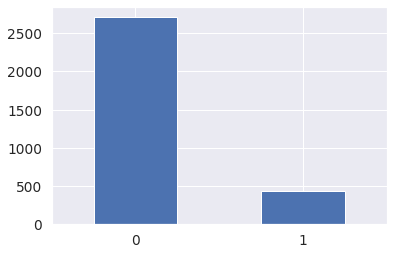

In [224]:
display(pd.DataFrame(train['Attrition'].value_counts()).reset_index().rename(columns={'index':'Attrition', 'Attrition':'count'}))
train['Attrition'].value_counts().plot(kind='bar', rot=0)

In [225]:
num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 
                'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                'RelationshipSatisfaction', 'StockOptionLevel',
                'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                'YearsWithCurrManager']
cat_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'source']
target = 'Attrition'

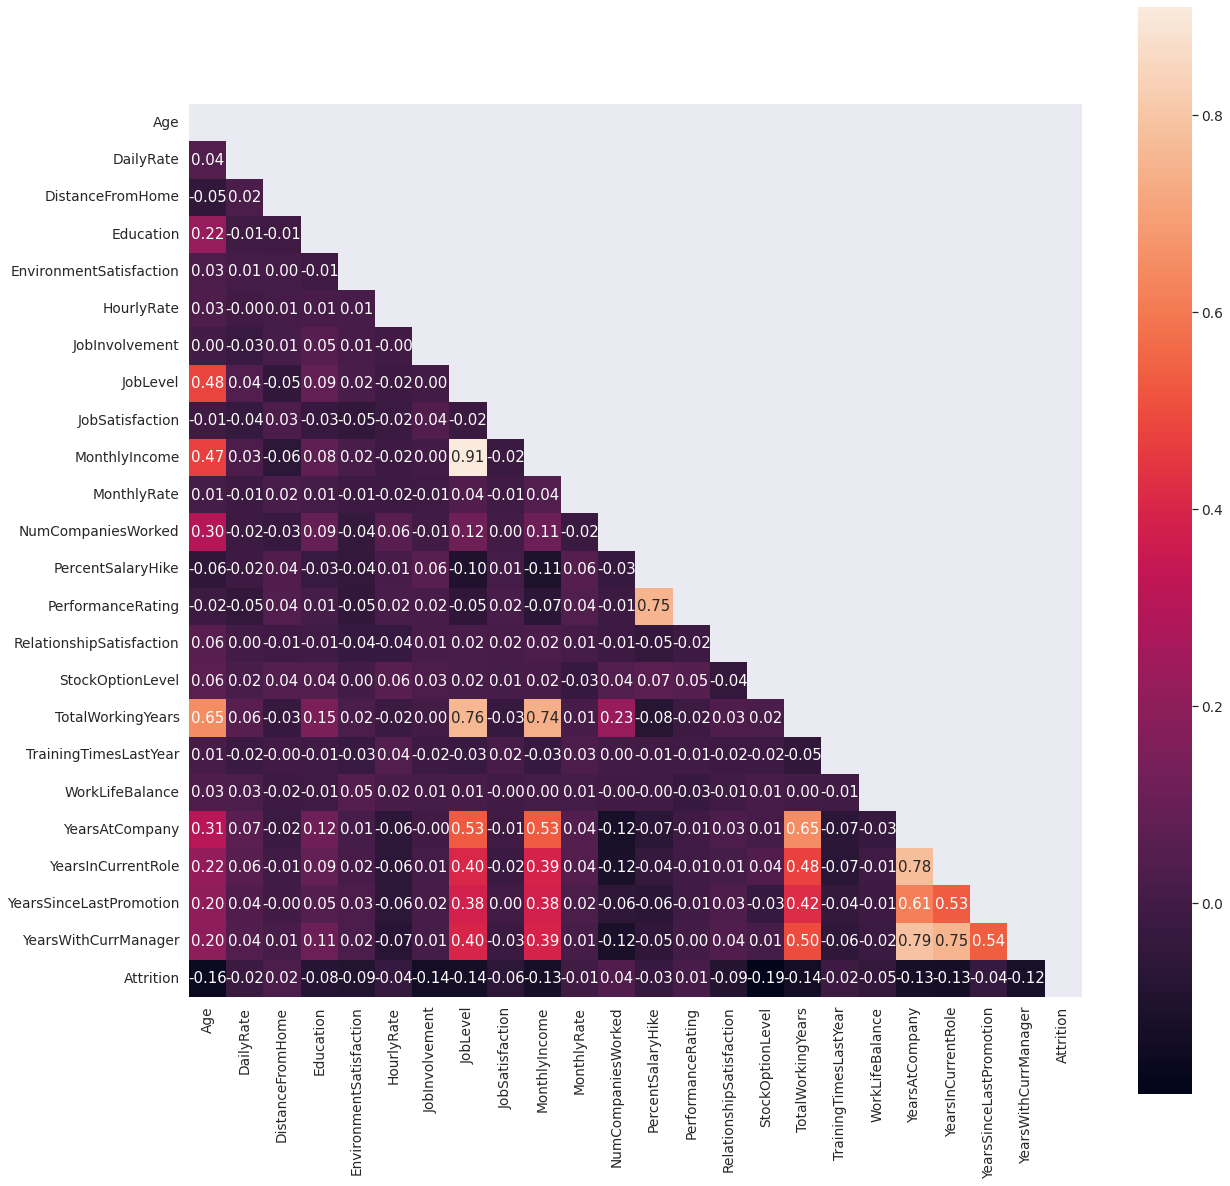

In [226]:
heat_map(df=train_df,
        col_name=target,
        num_features=num_features)

In [227]:
train_df["TotalWorkingYears"].unique()

array([10,  4, 15, 31,  6,  1, 18,  9, 17, 20, 28, 21,  5,  8, 33,  2, 12,
       11, 13, 24, 16,  0, 23,  7, 26, 32, 19, 22, 14,  3, 27, 30, 37, 34,
       40, 36, 29, 25, 38, 41, 35])

## 4. Train model

In [228]:
train_df = pd.concat([train_df, original])
train_df.reset_index(inplace=True, drop=True)
data_description(train_df)

Data description
Total number of records 3147
number of features 32


                        Name    Type  Unique levels  Missing
0                         id   int64           1952        0
1                        Age   int64             43        0
2             BusinessTravel  object              3        0
3                  DailyRate   int64            901        0
4                 Department  object              3        0
5           DistanceFromHome   int64             29        0
6                  Education   int64              6        0
7             EducationField  object              6        0
8    EnvironmentSatisfaction   int64              4        0
9                     Gender  object              2        0
10                HourlyRate   int64             71        0
11            JobInvolvement   int64              4        0
12                  JobLevel   int64              6        0
13                   JobRole  object              9        0
14           Jo

In [229]:
train_df.OverTime = train_df.OverTime.map(dict(Yes=1, No=0))
train_df.Gender = train_df.Gender.map(dict(Male=1, Female=0))
test_df.OverTime = test_df.OverTime.map(dict(Yes=1, No=0))
test_df.Gender = test_df.Gender.map(dict(Male=1, Female=0))

train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [230]:
train_df.head()

,id,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,36,599,24,3,4,1,42,3,1,...,1,0,0,0,0,0,0,0,1,0
1,1,35,921,8,3,1,1,46,3,1,...,0,0,0,0,0,0,1,0,1,0
2,2,32,718,26,3,3,1,80,3,2,...,0,0,0,0,0,1,0,1,0,0
3,3,38,1488,2,3,3,0,40,3,2,...,0,0,0,0,0,0,0,0,1,0
4,4,50,1017,5,4,2,0,37,3,5,...,0,1,0,0,0,0,0,0,0,1


In [231]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import lightgbm as lgbm
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier

In [232]:
clfs = []
scores = []
all_features = train_df.drop(['id', target], axis=1).columns
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

params = {'max_depth': 3,
          'learning_rate': 0.1,
          'min_child_weight': 4,
          'subsample': 0.7,
          'colsample_bytree': 0.3
         }

for i, (train_index, val_index) in enumerate(kf.split(train_df, y=train_df['Attrition'])):
    X_train, X_val = train_df[all_features].loc[train_index], train_df[all_features].loc[val_index]
    y_train, y_val = train_df[target][train_index], train_df[target][val_index]
    
    clf = XGBClassifier(**params,
                        n_estimators=20000,
                        seed=42)
    
    clf.fit(X_train.values, y_train,
            early_stopping_rounds=100, 
            eval_set=[(X_val.values, y_val)], 
            eval_metric=['auc'],
            verbose=1000)
    
    preds = clf.predict_proba(X_val.values)
    auc = roc_auc_score(y_val, preds[:, 1])
    
    clfs.append(clf)
    scores.append(auc)
    print(f'Score on fold {i}: {auc}')
    print('-'*50)
    
print(f'Mean score across all folds: {np.mean(scores)}')

[0]	validation_0-auc:0.72111


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[187]	validation_0-auc:0.85642
Score on fold 0: 0.8580174438108017
--------------------------------------------------
[0]	validation_0-auc:0.65725


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[320]	validation_0-auc:0.90406
Score on fold 1: 0.9079168064407916
--------------------------------------------------
[0]	validation_0-auc:0.63146


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[227]	validation_0-auc:0.85441
Score on fold 2: 0.8754612546125462
--------------------------------------------------
[0]	validation_0-auc:0.65649


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[435]	validation_0-auc:0.89928
Score on fold 3: 0.9109359275410935
--------------------------------------------------
[0]	validation_0-auc:0.67750


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[270]	validation_0-auc:0.83697
Score on fold 4: 0.8470311975847031
--------------------------------------------------
[0]	validation_0-auc:0.70174


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[187]	validation_0-auc:0.86313
Score on fold 5: 0.8700939282120095
--------------------------------------------------
[0]	validation_0-auc:0.68597


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[246]	validation_0-auc:0.83219
Score on fold 6: 0.8510566923851056
--------------------------------------------------
[0]	validation_0-auc:0.69124


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[131]	validation_0-auc:0.80185
Score on fold 7: 0.8157555994164593
--------------------------------------------------
[0]	validation_0-auc:0.68991


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[204]	validation_0-auc:0.83541
Score on fold 8: 0.8517120054921479
--------------------------------------------------
[0]	validation_0-auc:0.66661


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[164]	validation_0-auc:0.81009
Score on fold 9: 0.8222775251008325
--------------------------------------------------
Mean score across all folds: 0.8610258380596492


In [235]:
scores = []

params = {'loss_function': 'CrossEntropy',
          'learning_rate': 0.76,
          'l2_leaf_reg': 0.014,
          'colsample_bylevel': 0.06,
          'depth': 1,
          'boosting_type': 'Plain',
          'bootstrap_type': 'Bernoulli',
          'min_data_in_leaf': 18,
          'subsample': 0.99}

for i, (train_index, val_index) in enumerate(kf.split(train_df, y=train_df['Attrition'])):
    X_train, X_val = train_df[all_features].loc[train_index], train_df[all_features].loc[val_index]
    y_train, y_val = train_df[target][train_index], train_df[target][val_index]
    
    clf = CatBoostClassifier(**params,
                             iterations=20000,
                             eval_metric='AUC',
                             random_state=42)
    
    clf.fit(X_train.values, y_train, 
            eval_set=(X_val.values, y_val),
            early_stopping_rounds=100, verbose=1000)
    
    preds = clf.predict_proba(X_val.values)
    auc = roc_auc_score(y_val, preds[:, 1])
    
    clfs.append(clf)
    scores.append(auc)
    print(f'Score on fold {i}: {auc}')
    print('-'*90)
    
print(f'Mean score across all folds: {np.mean(scores)}')

0:	test: 0.5288913	best: 0.5288913 (0)	total: 59ms	remaining: 19m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8747903388
bestIteration = 255

Shrink model to first 256 iterations.
Score on fold 0: 0.874790338812479
------------------------------------------------------------------------------------------
0:	test: 0.4594515	best: 0.4594515 (0)	total: 1.09ms	remaining: 21.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9074136196
bestIteration = 157

Shrink model to first 158 iterations.
Score on fold 1: 0.9074136195907413
------------------------------------------------------------------------------------------
0:	test: 0.5054931	best: 0.5054931 (0)	total: 836us	remaining: 16.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.879067427
bestIteration = 63

Shrink model to first 64 iterations.
Score on fold 2: 0.8790674270379067
----------------------------------------------------------------------------------------

In [234]:
scores = []

params = {'learning_rate': 0.1,
          'num_leaves': 195,
          'max_depth': 9,
          'min_child_samples': 46,
          'reg_alpha': 0.01,
          'reg_lambda': 0.6,
          'min_split_gain': 1.42,
          'subsample': 0.45,
          'colsample_bytree': 0.3}

for i, (train_index, val_index) in enumerate(kf.split(train_df, y=train_df['Attrition'])):
    X_train, X_val = train_df[all_features].loc[train_index], train_df[all_features].loc[val_index]
    y_train, y_val = train_df[target][train_index], train_df[target][val_index]
    
    clf = lgbm.LGBMClassifier(**params,
                              n_estimators=20000,
                              metric='auc',
                              random_state=42)
    
    clf.fit(X_train.values, y_train, 
            eval_set=[(X_val.values, y_val)],
            eval_metric=['auc'],
            callbacks=[lgbm.early_stopping(100, verbose=True)])
            
    preds = clf.predict_proba(X_val.values)
    auc = roc_auc_score(y_val, preds[:, 1])
    
    clfs.append(clf)
    scores.append(auc)
    print(f'Score on fold {i}: {auc}')
    print('-'*50)
    
print(f'Mean score across all folds: {np.mean(scores)}')

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.866488
Score on fold 0: 0.8664877557866487
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.894918
Score on fold 1: 0.8949178128144918
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.854495
Score on fold 2: 0.8544951358604496
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.895002
Score on fold 3: 0.8944984904394498
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.825897
Score on fold 4: 0.825